Implementation of linear regression from scratch

In [78]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [79]:
# Calculate the mean and standard deviation along each column of X
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X - mean) / std
    return X_norm, mean, std

In [80]:
def fit(X, y, num_iterations, learning_rate):
    num_samples, num_features = X.shape

    # Initialize weights and bias to zeros
    weights = np.zeros((num_features, 1))
    bias = 0

    # Gradient descent
    for i in range(num_iterations):
        # Compute predictions
        y_predict = np.dot(X, weights) + bias
        # Compute gradients
        dw = (1 / num_samples) * np.dot(X.T, (y_predict - y))
        db = (1 / num_samples) * np.sum(y_predict - y)
        # Update parameters
        weights -= learning_rate * dw.reshape(-1, 1)
        bias -= learning_rate * db

    return weights, bias

In [81]:
def predict(X, weights, bias):
    y_predict = np.dot(X, weights) + bias
    return y_predict

In [82]:
def mean_square_error(y, y_predict):
    return np.mean(np.square(y - y_predict))

In [83]:
insurance_data = pd.read_csv('insurance.csv') #read the csv file
print(insurance_data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [84]:
X = insurance_data[['age', 'bmi']]
y = insurance_data['charges']

X_norm, mean, std = normalize(X.values)
y_norm, y_mean, y_std = normalize(y.values.reshape(-1, 1))

learning_rate = 0.001 
num_iterations = 1000

weights, bias = fit(X_norm, y_norm, num_iterations, learning_rate)
y_predict = predict(X_norm, weights, bias)
mse = mean_square_error(y_norm, y_predict)

# Denormalize the predicted and actual charges
y_predict_denorm = (y_predict * y_std) + y_mean.flatten()
y_denorm = (y_norm * y_std) + y_mean.flatten()

print("Weights:", weights)
print("Bias:", bias)
print("Mean Squared Error:", mse)



Weights: [[0.18361895]
 [0.11696098]]
Bias: -2.458090200410738e-17
Mean Squared Error: 0.8958858417041768


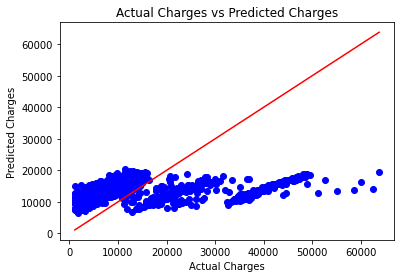

In [85]:
# Plotting the results
plt.scatter(y_denorm, y_predict_denorm, color='blue', label='Actual')
plt.plot([min(y_denorm), max(y_denorm)], [min(y_denorm), max(y_denorm)], color='red', label='Predicted')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual Charges vs Predicted Charges')
plt.show()